# What are the most demanded skills for the top 3 most popular data roles?

## Methodology

1. Clean-up skill column
2. Calculate skill count based on `job_title_short`
3. Calculate skill percentage
4. Plot final findings

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Filtering exclusively for the United States
df_US = df[df['job_country'] == 'United States']

In [3]:
# Use the explode method to break out those lists of the job skills and get them into a new Data Frame called df_skills
df_skills = df_US.explode('job_skills')

In [4]:
# Visualuze what we have in this Data Frame, looking into 2 columns, job_title and job_skills
df_skills[['job_title', 'job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


In [5]:
# Now that we confirmed that the skills are broken down, let's do a groupby on the job skills and also on the job_title_short column
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count

job_skills  job_title_short          
airflow     Business Analyst               38
            Cloud Engineer                 27
            Data Analyst                  387
            Data Engineer                4716
            Data Scientist               1166
                                         ... 
zoom        Machine Learning Engineer       5
            Senior Data Analyst            50
            Senior Data Engineer           30
            Senior Data Scientist          25
            Software Engineer              16
Length: 1870, dtype: int64

In [ ]:
# df_skills count is a series, let's convert it into a Data Frame to make it a little easier to manipulate.
# For this we're going to run reset_index on it and we're going to rename that values column - the one on the far right - as skill_count 
df_skills_count = df_skills_count.reset_index(name='skill_count')

In [9]:
df_skills_count

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,38
1,airflow,Cloud Engineer,27
2,airflow,Data Analyst,387
3,airflow,Data Engineer,4716
4,airflow,Data Scientist,1166
...,...,...,...
1865,zoom,Machine Learning Engineer,5
1866,zoom,Senior Data Analyst,50
1867,zoom,Senior Data Engineer,30
1868,zoom,Senior Data Scientist,25


In [10]:
# Let's now sort the skill_count column from highest to lowest
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [13]:
# Now we need to get the too 3 rows. First we get the unique occurrences of each job_title_short, and make it a list with the .tolist method
job_titles = df_skills_count['job_title_short'].unique().tolist()

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Analyst',
 'Senior Data Engineer',
 'Business Analyst',
 'Software Engineer',
 'Machine Learning Engineer',
 'Cloud Engineer']

In [15]:
# Now we're going to get only the top 3 by slicing it, and assign them in alphabetical order by applying the sorted function
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

### Plotting it!

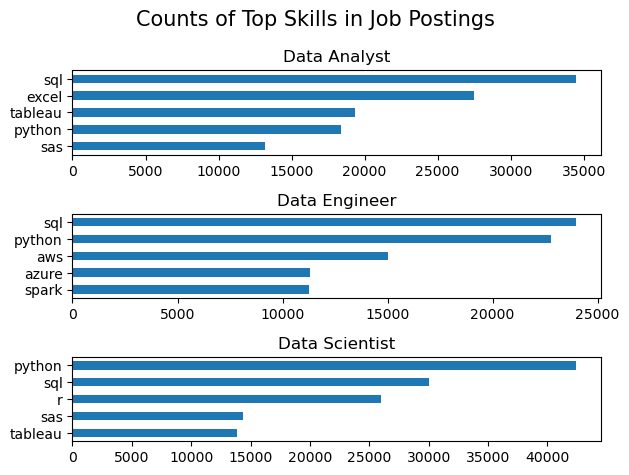

In [35]:
# we're going to disply the data in 3 separate plots, one for each job_title_short. But we're doing it programmatically

fig, ax =plt.subplots(len(job_titles), 1)


# Now we're going to iterate through the list of job titles to plot each one of them
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
plt.tight_layout()
plt.show()

In [25]:
# Now we need to convert these counts to percentage
# First we need to find out how many job postings we have for Data Analysts, Dat Scientists and Data Engineers, 
# once we have this total number of postings and calculate the percentage as follows:
# % of skill in a job posting = (skill count in pob postings) / (total count of job postings)

df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

In [28]:
# Now we need to merge the above with our skills counts. We're going to do a left-join merge, using the how='left' patameter.
# A left marge means we're going to get EVERYTHING from the left table (df_skills_count) and merge with what's available in this Data Frame 
# We need to specify the column we're merging on with the parameter on='job_title_short'
pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')
# The result is that we'll have the jobs_total column appended right on to this Data Frame

,job_skills,job_title_short,skill_count,jobs_total
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1865,clojure,Software Engineer,1,1814
1866,vb.net,Senior Data Scientist,1,12946
1867,fortran,Machine Learning Engineer,1,921
1868,planner,Cloud Engineer,1,423


In [30]:
# Assigning the command above to the variable df skills percent
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1865,clojure,Software Engineer,1,1814
1866,vb.net,Senior Data Scientist,1,12946
1867,fortran,Machine Learning Engineer,1,921
1868,planner,Cloud Engineer,1,423


In [31]:
# Now that we have the count of skill per job_title and the overall total per skill, we can calculate the percentage
# For this, we're going to create a new column to our Data Frame to store this percent value. The name of the new column is skill_percent
df_skills_perc['skill_percent'] = 100 * df_skills_perc['skill_count'] / df_skills_perc['jobs_total']
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


### Plotting

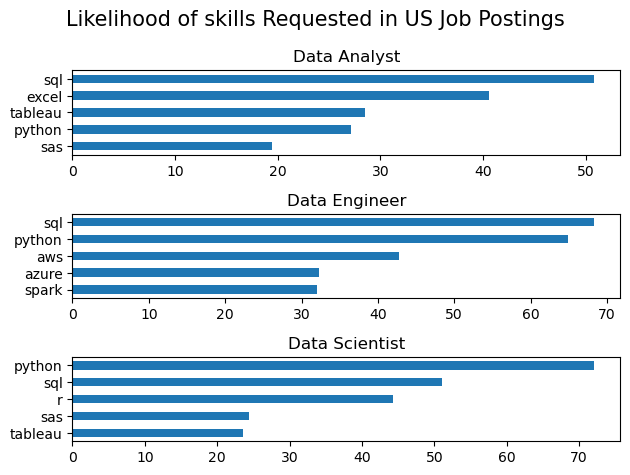

In [37]:
fig, ax =plt.subplots(len(job_titles), 1)

# Now we're going to iterate through the list of job titles to plot each one of them
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Likelihood of skills Requested in US Job Postings', fontsize=15)
plt.tight_layout()
plt.show()

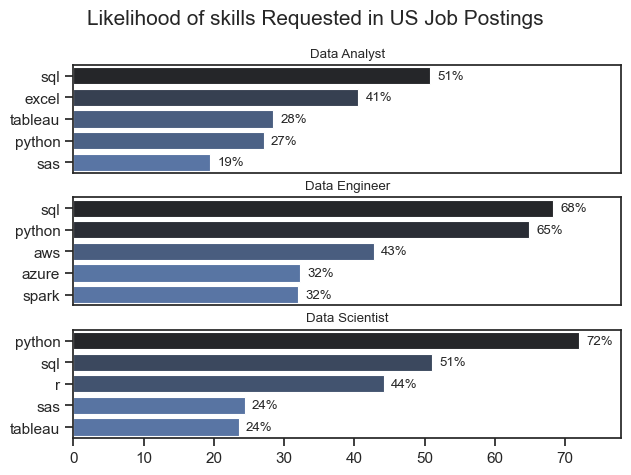

In [67]:
# Let's upgrade the above chart by using seaborn

fig, ax =plt.subplots(len(job_titles), 1)

# Now we're going to iterate through the list of job titles to plot each one of them
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.set_theme('paper')
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0,78)

    # Cycling through the index (n) and value (v) - Adding the percentage next to each bar
    for n, v in enumerate(df_plot['skill_percent']):
       # Explanation of the .text(x, y, value, va) | # We're using v+1 so that the number is not too close to the bar 
       # va='center' is to align the number vertically with the bar | To get the percentage in a presentable way, we're using the f string to clean it up
       # .0f means we're getting the floating point but without the decimals, it rounds it for us.     
       ax[i].text(v+1, n, f'{v:.0f}%', va='center') 

    # We want to only show the x-axis intervals in the bottom graph, so we're using an if statement to remove it from the top 2 graps
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])


fig.suptitle('Likelihood of skills Requested in US Job Postings', fontsize=15)
plt.tight_layout(h_pad=0.5) #fix the overlap
plt.show()

As we can see with our final version of our visualization above, **SQL** and **Python** are very common across these three roles. In fact, they are the top 2 for Data Engineers and Data Scientists and are respectively #1 and #4 for Data Analysts! That tells us how important it is to invest in these two skills if we want to pursue a role in Data.